The goal of this exercise is to acertain which item of the data set has the highest correlation with gross earnings of the movies. The assumption is that the higher the budget the higher the gross earnings. We are going to investigate if that assumption is true or false. 
The dataset is downloaded from kaggle at https://www.kaggle.com/datasets/danielgrijalvas/movies?resource=download.

In [1]:
#Import libraries

import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,7) #Adjust the configuration of the plots we will create



In [2]:
#Lets read in the data
df = pd.read_csv('movies.csv')

#Lets take a look at the data
df.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:


#Checking for missing data
for col in df.columns:
    percentage_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percentage_missing, 2)))

name - 0.0%
rating - 0.01%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.28%
gross - 0.02%
company - 0.0%
runtime - 0.0%


In [4]:
#Each columns data type
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [5]:
#Lets change the data type of the 'budget' and 'gross columns to integer

df['budget'] = df['budget'].dropna().astype('int64')
df['gross'] = df['gross'].dropna().astype('int64')


In [6]:
#Creating a correct release year column
df['correct_year'] = df['released'].str.extract(r'(\d{4})').astype('Int64')
df.drop(columns=['year'], inplace=True)
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [7]:
#Sorting the data by gross revenue
df.sort_values(by=['gross'], inplace=False, ascending=False)
pd.set_option('display.max_rows', None)

In [8]:
#Dropping dublicate rows
df.drop_duplicates().head()


,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


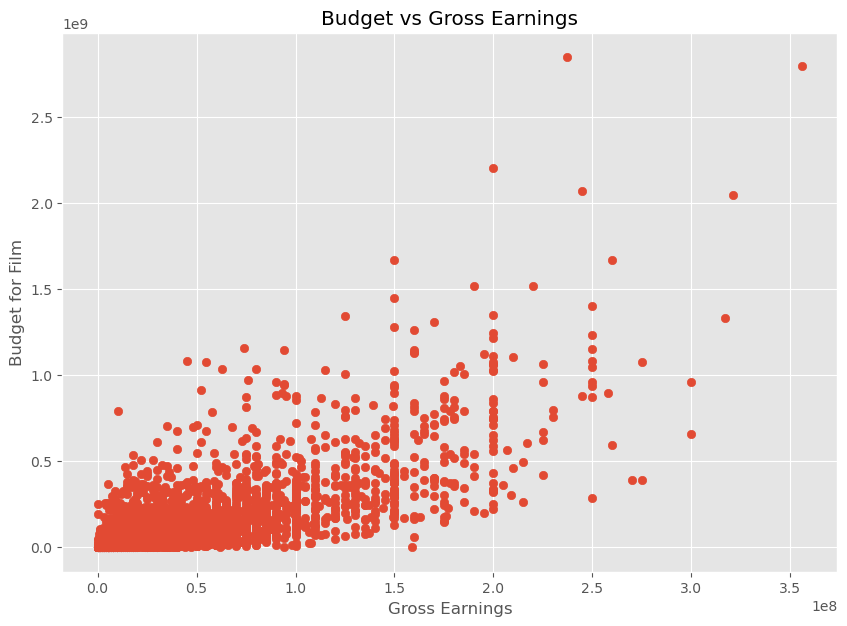

In [9]:
#A scatter plot between budget and gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

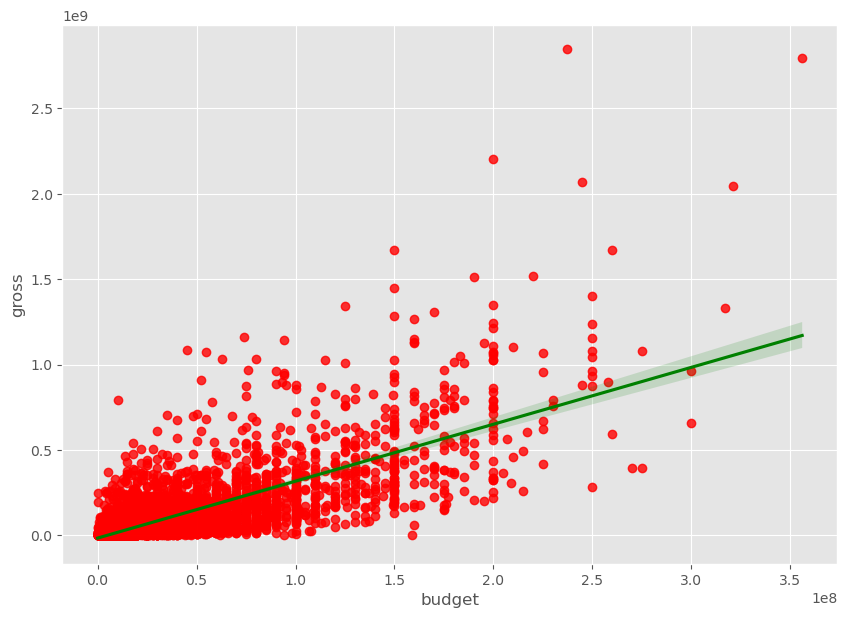

In [10]:
#We now look at the regression plot between budget and gross
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"green"})
plt.show()

In [11]:
#Lets start looking at the correlation matrix
df.corr(method='pearson', numeric_only=True) #pearson, kendall, spearman

,score,votes,budget,gross,runtime,correct_year
score,1.000000,0.409182,0.076254,0.186258,0.399451,0.105994
votes,0.409182,1.000000,0.442429,0.630757,0.309212,0.218429
budget,0.076254,0.442429,1.000000,0.740395,0.320447,0.321918
gross,0.186258,0.630757,0.740395,1.000000,0.245216,0.250514
runtime,0.399451,0.309212,0.320447,0.245216,1.000000,0.120636
correct_year,0.105994,0.218429,0.321918,0.250514,0.120636,1.000000


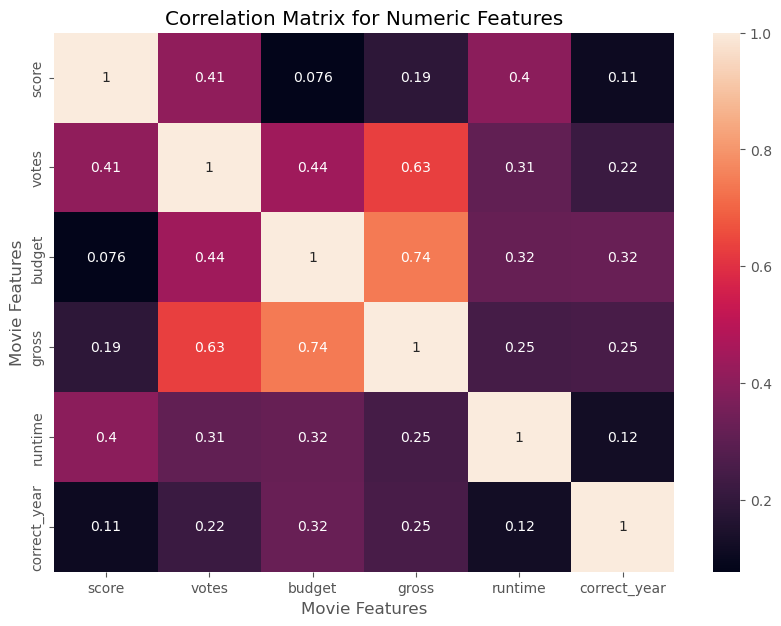

In [12]:
#There is hight correlation between budget and gross earnings

#We will now visualise the correlation matrix
correlation_matrix = df.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [13]:
#Now we convert the categorical columns to numerical values so we can include them in the correlation matrix
df_numerical = df
for col_name in df_numerical.columns:
    if(df_numerical[col_name].dtype == 'object'):
        df_numerical[col_name] = df_numerical[col_name].astype('category')
        df_numerical[col_name] = df_numerical[col_name].cat.codes
df_numerical.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,6587,6,6,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1980
1,5573,6,1,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1980
2,5142,4,0,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1980
3,286,4,4,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1980
4,1027,6,4,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1980


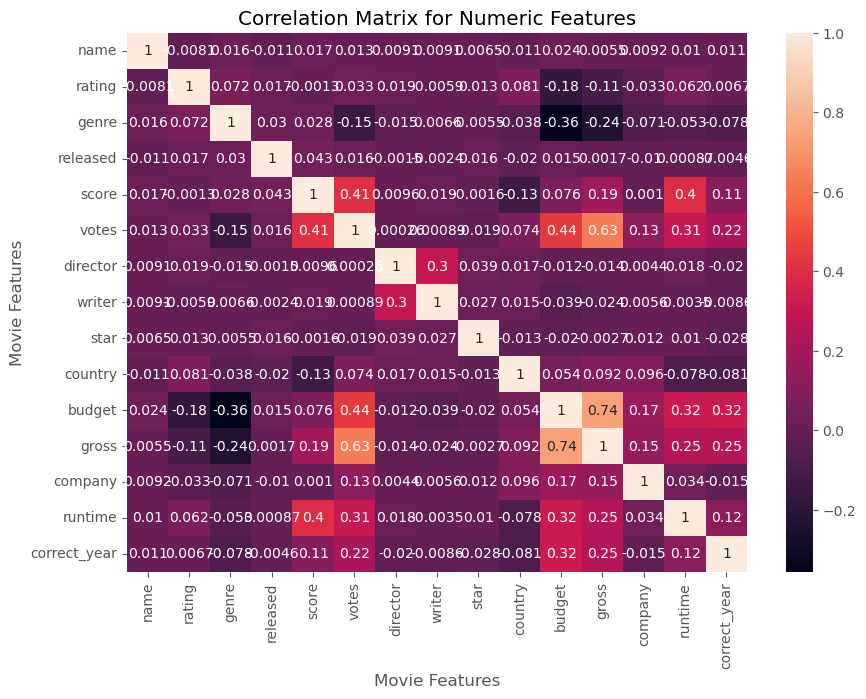

In [14]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [15]:
df_numerical.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
name,1.000000,-0.008069,0.016355,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392,0.010699
rating,-0.008069,1.000000,0.072423,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145,0.006741
genre,0.016355,0.072423,1.000000,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,-0.077911
released,-0.011311,0.016613,0.029822,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868,-0.004644
score,0.017097,-0.001314,0.027965,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451,0.105994
votes,0.013088,0.033225,-0.145307,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212,0.218429
director,0.009079,0.019483,-0.015258,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624,-0.020422
writer,0.009081,-0.005921,0.006567,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511,-0.008611
star,0.006472,0.013405,-0.005477,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174,-0.027611
country,-0.010737,0.081244,-0.037615,-0.020427,-0.133348,0.073625,0.017490,0.015343,-0.012998,1.000000,0.054063,0.092129,0.095548,-0.078412,-0.080844


In [16]:
correlation_matrix = df_numerical.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              released       -0.011311
              score           0.017097
              votes           0.013088
              director        0.009079
              writer          0.009081
              star            0.006472
              country        -0.010737
              budget          0.023970
              gross           0.005533
              company         0.009211
              runtime         0.010392
              correct_year    0.010699
rating        name           -0.008069
              rating          1.000000
              genre           0.072423
              released        0.016613
              score          -0.001314
              votes           0.033225
              director        0.019483
              writer         -0.005921
              star            0.013405
              country         0.081244
              budget     

In [20]:
sorted_pairs = corr_pairs.sort_values()
pd.set_option('display.max_rows', None)
sorted_pairs

genre         budget         -0.356564
budget        genre          -0.356564
gross         genre          -0.235650
genre         gross          -0.235650
rating        budget         -0.176002
budget        rating         -0.176002
votes         genre          -0.145307
genre         votes          -0.145307
country       score          -0.133348
score         country        -0.133348
rating        gross          -0.107339
gross         rating         -0.107339
country       correct_year   -0.080844
correct_year  country        -0.080844
country       runtime        -0.078412
runtime       country        -0.078412
correct_year  genre          -0.077911
genre         correct_year   -0.077911
              company        -0.071067
company       genre          -0.071067
runtime       genre          -0.052711
genre         runtime        -0.052711
writer        budget         -0.039451
budget        writer         -0.039451
country       genre          -0.037615
genre         country    

In [22]:
high_corr = sorted_pairs[((sorted_pairs)>0.4) & ((sorted_pairs)<1)]
high_corr


score   votes     0.409182
votes   score     0.409182
budget  votes     0.442429
votes   budget    0.442429
        gross     0.630757
gross   votes     0.630757
        budget    0.740395
budget  gross     0.740395
dtype: float64

As we can see from our results, Votes and Budget has the highest correlation to Gross earnings. This indicates that high budget does not necessarily indicate good earnings. However, when the movie has high votes, this can indicate relative high earnings with respect to the budget.